## Import & Read

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset
# source dataset : https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv
data = pd.read_csv("pima indians diabetes.csv")

In [3]:
data.head()

,num_pregnant,plasma_concentrate,blood_press,skin_thick,insul,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Description

preg = Number of times pregnant

plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

pres = Diastolic blood pressure (mm Hg)

skin = Triceps skin fold thickness (mm)

test = 2-Hour serum insulin (mu U/ml)

mass = Body mass index (weight in kg/(height in m)^2)

pedi = Diabetes pedigree function

age = Age (years)

class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)


## Data cleaning & preprocessing

Detecting & handling missing values

In [4]:
data.isnull().any()

num_pregnant          False
plasma_concentrate    False
blood_press           False
skin_thick            False
insul                 False
bmi                   False
pedigree              False
age                   False
class                 False
dtype: bool

In [5]:
data.isna().any()

num_pregnant          False
plasma_concentrate    False
blood_press           False
skin_thick            False
insul                 False
bmi                   False
pedigree              False
age                   False
class                 False
dtype: bool

Detecting & handling outliers

In [6]:
data.columns

Index(['num_pregnant', 'plasma_concentrate', 'blood_press', 'skin_thick',
       'insul', 'bmi', 'pedigree', 'age', 'class'],
      dtype='object')

In [7]:
#function to detect outlier
def outlier(sample):
    q1 = sample.quantile(0.25)
    q3 = sample.quantile(0.75)
    iqr = q3 - q1
    lower_range = q1 - (1.5 * iqr)
    upper_range = q3 + (1.5 * iqr)
    
    number_outlier=len(sample[sample>upper_range])+len(sample[sample<lower_range])
    print('- Number of outlier from column {} : {}'.format(sample.name,number_outlier))

In [8]:
for i in data.columns:
    outlier(data[i])

- Number of outlier from column num_pregnant : 4
- Number of outlier from column plasma_concentrate : 5
- Number of outlier from column blood_press : 45
- Number of outlier from column skin_thick : 1
- Number of outlier from column insul : 34
- Number of outlier from column bmi : 19
- Number of outlier from column pedigree : 29
- Number of outlier from column age : 9
- Number of outlier from column class : 0


In [9]:
plot = list(data.columns)

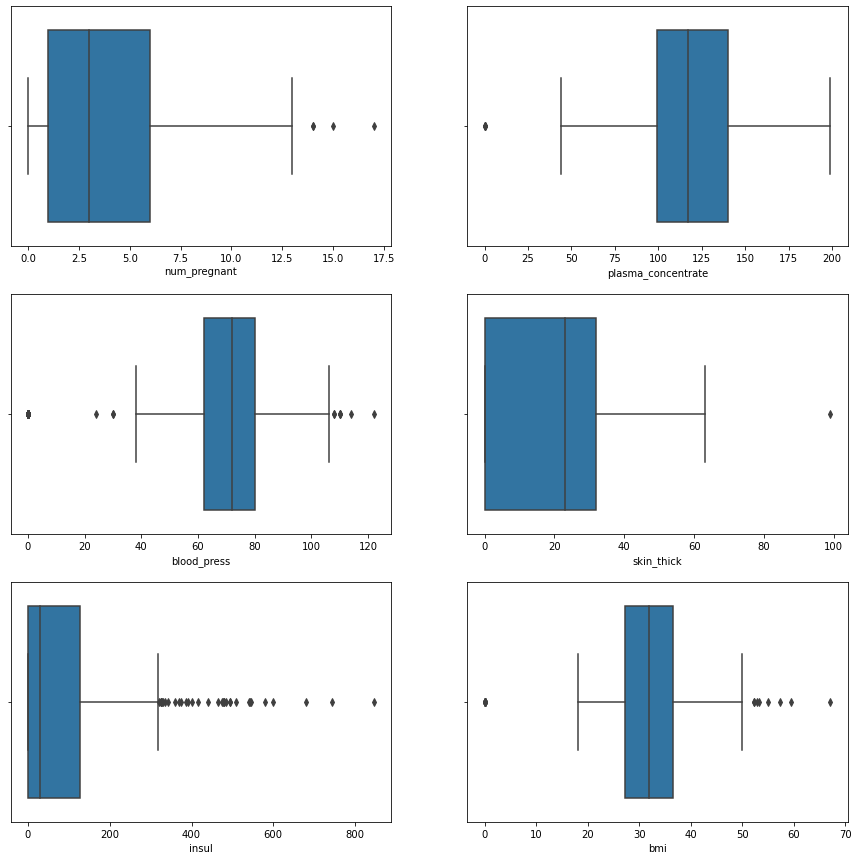

In [10]:
fig, ax = plt.subplots(3,2, figsize=(15,15))

for var,ax in zip(plot,ax.flatten()):
    sns.boxplot(data[var],ax=ax)

In [11]:
data

,num_pregnant,plasma_concentrate,blood_press,skin_thick,insul,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Exploratory Data Analysis

In [12]:
data.corr()

,num_pregnant,plasma_concentrate,blood_press,skin_thick,insul,bmi,pedigree,age,class
num_pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma_concentrate,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
blood_press,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin_thick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insul,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

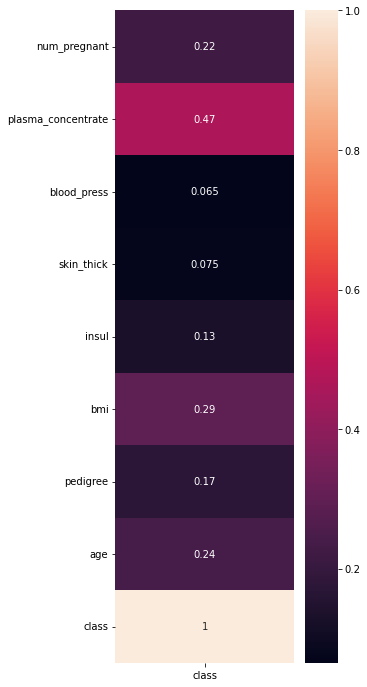

In [13]:
plt.figure(figsize=(4,12))
sns.heatmap(data.corr()[['class']],annot=True)

## Model & Evaluation

splitting

In [14]:
# split data train & test
from sklearn.model_selection import train_test_split

x = data.drop('class',axis=1)
y = data['class']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

feature scaling

In [15]:
# feature engineering (scaling)
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
columns = ['plasma_concentrate','bmi','blood_press']

for i in columns:
    x_train[i] = scaler.fit_transform(np.array(x_train[i]).reshape(-1,1))

In [18]:
x_train.head()

,num_pregnant,plasma_concentrate,blood_press,skin_thick,insul,bmi,pedigree,age
60,2,0.422111,0.000000,0,0,0.000000,0.304,21
618,9,0.562814,0.672131,24,0,0.420268,1.282,50
346,1,0.698492,0.377049,19,83,0.427720,0.654,22
294,0,0.809045,0.409836,0,0,0.326379,0.254,65
231,6,0.673367,0.655738,37,370,0.688525,0.238,46


imbalance data

In [19]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

<AxesSubplot:>

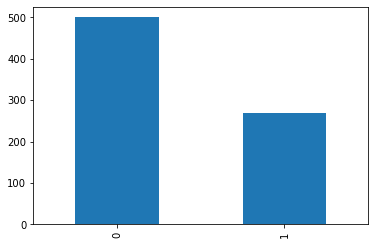

In [20]:
data['class'].value_counts().plot(kind='bar')

In [21]:
under_samp = RandomUnderSampler(random_state=42)
over_samp = SMOTE(random_state=42)

In [22]:
x_under, y_under = under_samp.fit_resample(x_train, y_train)
x_over, y_over = over_samp.fit_resample(x_train, y_train)

In [23]:
y_under.value_counts()

0    213
1    213
Name: class, dtype: int64

In [24]:
y_over.value_counts()

0    401
1    401
Name: class, dtype: int64

modeling

In [25]:
# Modeling
from sklearn.svm import SVC

In [26]:
svm = SVC()
svm_under = SVC()
svm_over = SVC()

In [27]:
svm.fit(x_train, y_train)
svm_under.fit(x_under,y_under)
svm_over.fit(x_over,y_over)

SVC()

In [28]:
y_pred = svm.predict(x_test)
y_pred_under = svm_under.predict(x_test)
y_pred_over = svm_over.predict(x_test)

In [29]:
compare = pd.DataFrame({
    'Actual' : y_test,
    'Prediction' : y_pred,
    'Prediction US' : y_pred_under,
    'Prediction OS' : y_pred_over,
})
compare

,Actual,Prediction,Prediction US,Prediction OS
668,0,0,1,1
324,0,0,1,1
624,0,0,1,1
690,0,0,1,1
473,0,0,1,1
...,...,...,...,...
355,1,0,1,1
534,0,0,0,0
344,0,0,1,1
296,1,0,1,1


In [30]:
#metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.98      0.78        99
           1       0.33      0.02      0.03        55

    accuracy                           0.64       154
   macro avg       0.49      0.50      0.41       154
weighted avg       0.53      0.64      0.51       154



Text(33.0, 0.5, 'Actual')

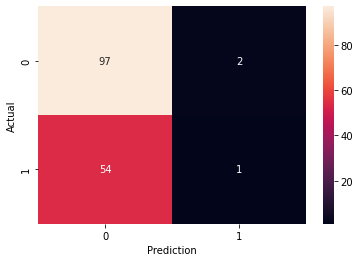

In [33]:
sns.heatmap(confusion_matrix(y_test, y_pred) ,annot=True)
plt.xlabel("Prediction")
plt.ylabel("Actual")

In [37]:
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred_under))
print(accuracy_score(y_test, y_pred_over))

0.6363636363636364
0.44805194805194803
0.42207792207792205


## Tuning

Feature Selection

<AxesSubplot:>

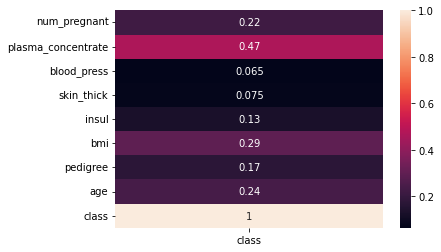

In [44]:
sns.heatmap(data.corr()[['class']],annot=True)

In [52]:
data.corr()['class'].sort_values()

blood_press           0.065068
skin_thick            0.074752
insul                 0.130548
pedigree              0.173844
num_pregnant          0.221898
age                   0.238356
bmi                   0.292695
plasma_concentrate    0.466581
class                 1.000000
Name: class, dtype: float64

In [53]:
fs = ['num_pregnant','age','bmi','plasma_concentrate']

In [58]:
x_fs = data[fs]

In [59]:
x_train_fs, x_test_fs, y_train_fs, y_test_fs = train_test_split(x_fs,y, test_size=0.2, random_state=42)

In [60]:
svm_fs = SVC()

In [61]:
svm_fs.fit(x_train_fs,y_train_fs)

SVC()

In [62]:
y_pred_fs = svm_fs.predict(x_test_fs)

In [63]:
compare = pd.DataFrame({
    'Actual' : y_test,
    'Prediction' : y_pred,
    'Prediction US' : y_pred_under,
    'Prediction OS' : y_pred_over,
    'Prediction FS' : y_pred_fs
})
compare

,Actual,Prediction,Prediction US,Prediction OS,Prediction FS
668,0,0,1,1,0
324,0,0,1,1,0
624,0,0,1,1,0
690,0,0,1,1,0
473,0,0,1,1,0
...,...,...,...,...,...
355,1,0,1,1,1
534,0,0,0,0,0
344,0,0,1,1,0
296,1,0,1,1,0


In [66]:
print('SVM :', "{:.2f}".format(accuracy_score(y_test, y_pred)*100))
print('SVM Undersampling :', "{:.2f}".format(accuracy_score(y_test, y_pred_under)*100))
print('SVM Oversampling :', "{:.2f}".format(accuracy_score(y_test, y_pred_over)*100))
print('SVM Feature Selection :', "{:.2f}".format(accuracy_score(y_test_fs, y_pred_fs)*100))

SVM : 63.64
SVM Undersampling : 44.81
SVM Oversampling : 42.21
SVM Feature Selection : 77.27
